<a href="https://colab.research.google.com/github/chuan1215/DLI_GroupAG/blob/main/TangSiChuon_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount My Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Library

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [3]:
data_path = "/content/drive/MyDrive/Colab Notebooks/dataset_phishing.csv"
df = pd.read_csv(data_path)

# Display dataset info
print("Initial dataset shape:", df.shape)
df.head();

Initial dataset shape: (11430, 89)


Data Cleaning

In [4]:
# Drop rows with missing values
df.dropna(inplace=True)
print("After dropping NA:", df.shape)

# Check if there are any categorical values that need encoding
print("Data types:\n", df.dtypes)

# Identify the label column (based on your output, it's likely 'status')
if 'class' in df.columns:
    df.rename(columns={'class': 'label'}, inplace=True)
elif 'status' in df.columns:
    df.rename(columns={'status': 'label'}, inplace=True)
else:
    raise KeyError("No target label column found. Please ensure the dataset has a 'class' or 'status' column.")

# Drop non-numeric and non-informative columns like 'url'
df.drop(columns=['url'], inplace=True, errors='ignore')

# Convert label column to binary (e.g., 'phishing' = 1, 'legitimate' = 0)
df['label'] = df['label'].map({'phishing': 1, 'legitimate': 0})

After dropping NA: (11430, 89)
Data types:
 url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object


Data Cleaning and Preparation for Modeling

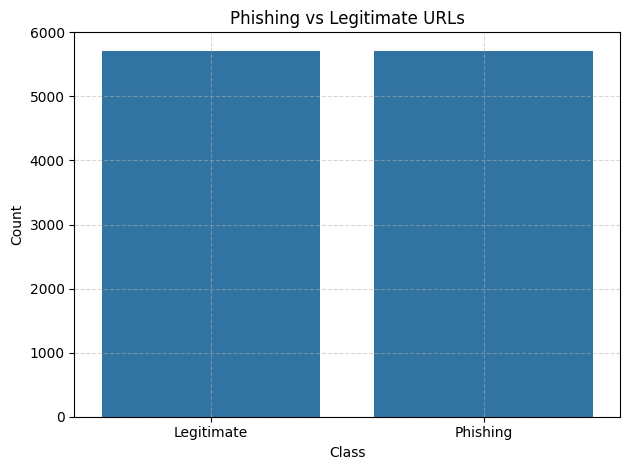

In [5]:
sns.countplot(data=df, x='label')
plt.title('Phishing vs Legitimate URLs')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Create DNN Model

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the Model

In [7]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=32,
                    verbose=1)

Epoch 1/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8089 - loss: 0.4275 - val_accuracy: 0.9514 - val_loss: 0.1282
Epoch 2/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9405 - loss: 0.1627 - val_accuracy: 0.9523 - val_loss: 0.1185
Epoch 3/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9466 - loss: 0.1494 - val_accuracy: 0.9628 - val_loss: 0.1094
Epoch 4/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9532 - loss: 0.1337 - val_accuracy: 0.9637 - val_loss: 0.1018
Epoch 5/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9570 - loss: 0.1192 - val_accuracy: 0.9646 - val_loss: 0.0979
Epoch 6/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9622 - loss: 0.1115 - val_accuracy: 0.9672 - val_loss: 0.0956
Epoch 7/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9603 - loss: 0.1088 - val_accuracy: 0.9681 - val_loss: 0.0971
Epoch 8/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9654 - loss: 0.1038 - val_accuracy: 0.

Evaluate performance

In [13]:
# Evaluate on test set
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.4f}%")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(df_report.round(4))

Test Accuracy: 96.5879%
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1117   40]
 [  38 1091]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1157
           1       0.96      0.97      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

              precision  recall  f1-score    support
Legitimate       0.9671  0.9654    0.9663  1157.0000
Phishing         0.9646  0.9663    0.9655  1129.0000
accuracy         0.9659  0.9659    0.9659     0.9659
macro avg        0.9659  0.9659    0.9659  2286.0000
weighted avg     0.9659  0.9659    0.9659  2286.0000


Confusion Matrix

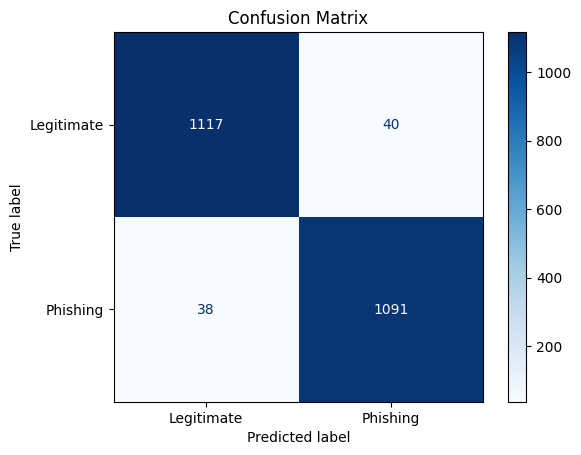

Classification Report:

              precision  recall  f1-score    support
Legitimate       0.9671  0.9654    0.9663  1157.0000
Phishing         0.9646  0.9663    0.9655  1129.0000
accuracy         0.9659  0.9659    0.9659     0.9659
macro avg        0.9659  0.9659    0.9659  2286.0000
weighted avg     0.9659  0.9659    0.9659  2286.0000


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report



# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legitimate', 'Phishing'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
report = classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing'], output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report.round(4))

Accuracy & Loss Curves

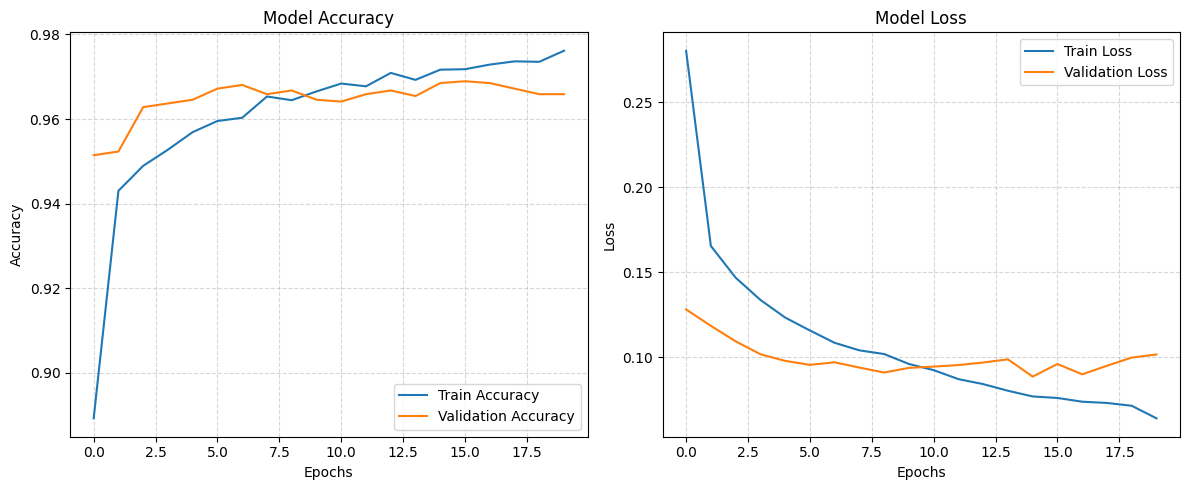

In [10]:
# Plot training history
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Precision-Recall Curve

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


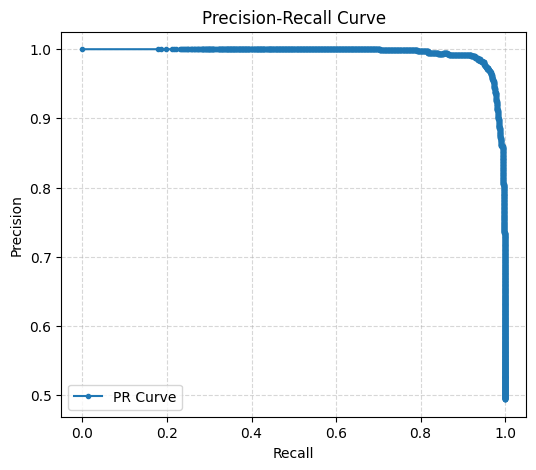

In [11]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Get predicted probabilities for positive class
y_pred_proba = model.predict(X_test).ravel()

# === Precision-Recall Curve ===
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

ROC Curve

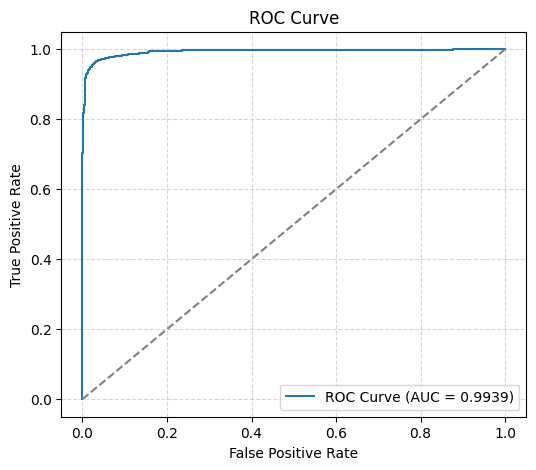

In [12]:
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()